In [1]:
#importing libraries
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

## Importing data and it's analysis

In [2]:
#importing data
path = r'data/heart.csv'
# path = r'D:\Deep_Learning_Projects\Heart_Disease_Prediction\heart.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#looking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

In [8]:
df.target.value_counts(normalize = False).round(3)

1    165
0    138
Name: target, dtype: int64

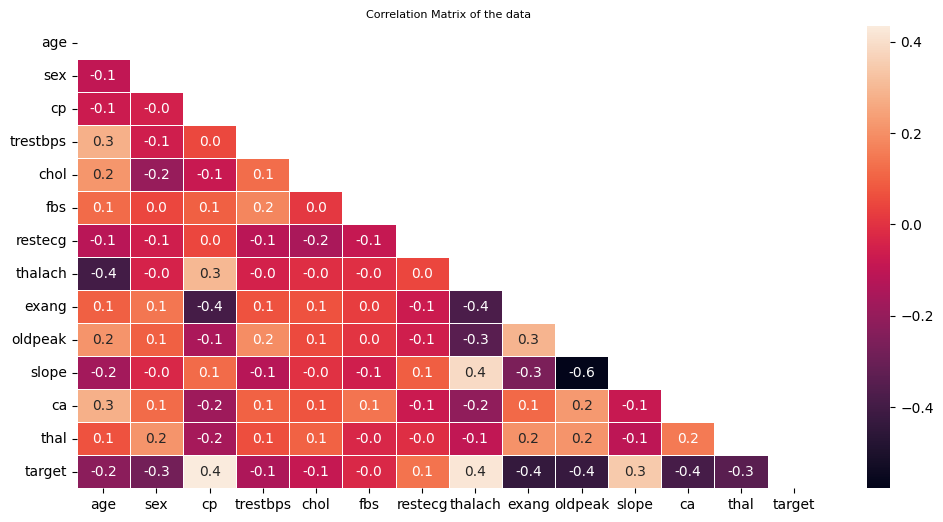

In [9]:
plt.figure(figsize=(12,6))
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot = True, fmt=".1f", linewidth=.5, mask = mask)
plt.title("Correlation Matrix of the data", fontsize = 8);

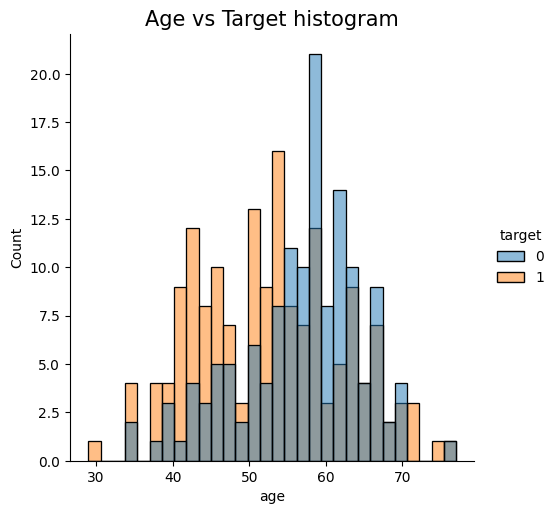

In [10]:
sns.displot(data =df, x = 'age', hue = 'target', kind = 'hist', multiple = 'layer', bins = 30)
plt.title("Age vs Target histogram", fontsize = 15);

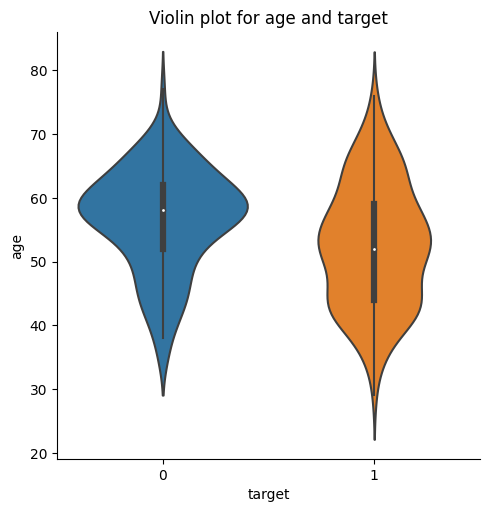

In [11]:
sns.catplot(data = df, x = 'target', y = 'age', kind = 'violin')
plt.title("Violin plot for age and target");

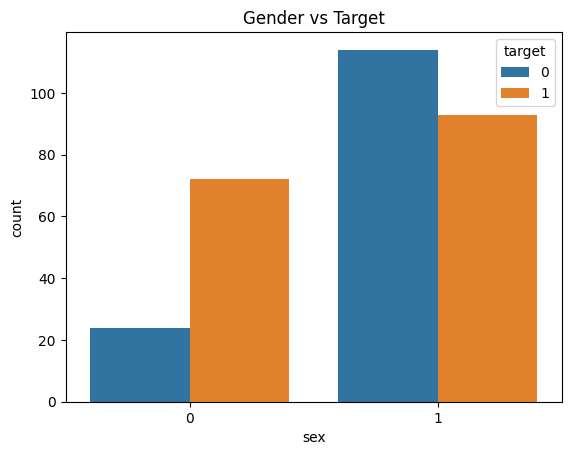

In [12]:
sns.countplot(data =df, x = 'sex',  hue = 'target')
plt.title("Gender vs Target");

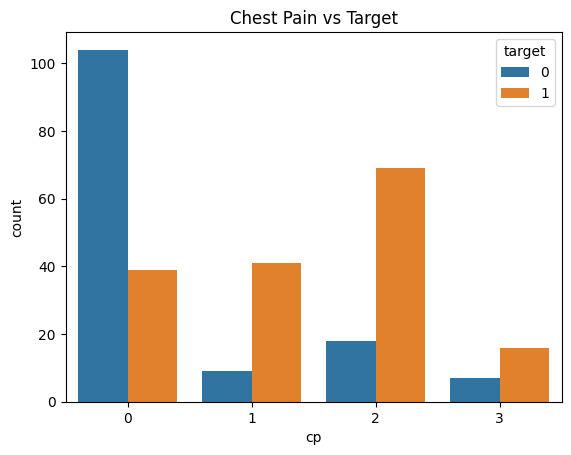

In [13]:
sns.countplot(data =df, x = 'cp',  hue = 'target')
plt.title("Chest Pain vs Target");

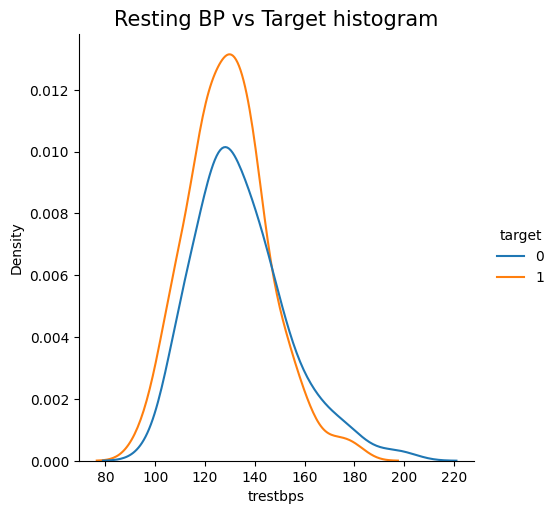

In [14]:
sns.displot(data =df, x = 'trestbps', hue = 'target', kind = 'kde')
plt.title("Resting BP vs Target histogram", fontsize = 15);

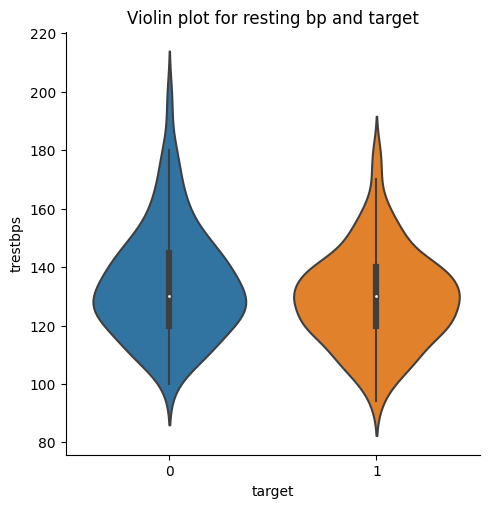

In [15]:
sns.catplot(data = df, x = 'target', y = 'trestbps', kind = 'violin')
plt.title("Violin plot for resting bp and target");

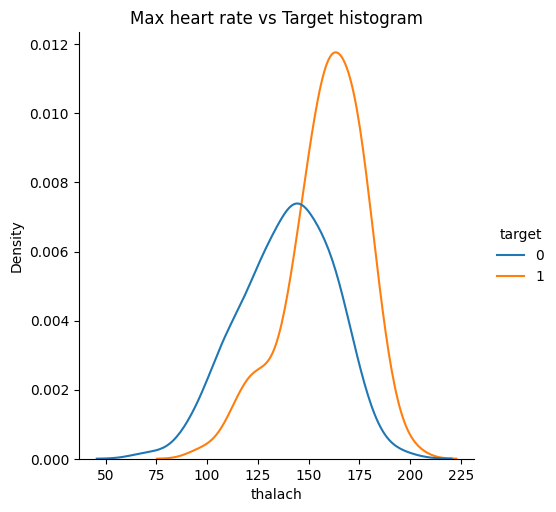

In [16]:
sns.displot(data =df, x = 'thalach', hue = 'target', kind = 'kde')
plt.title("Max heart rate vs Target histogram", fontsize = 12);

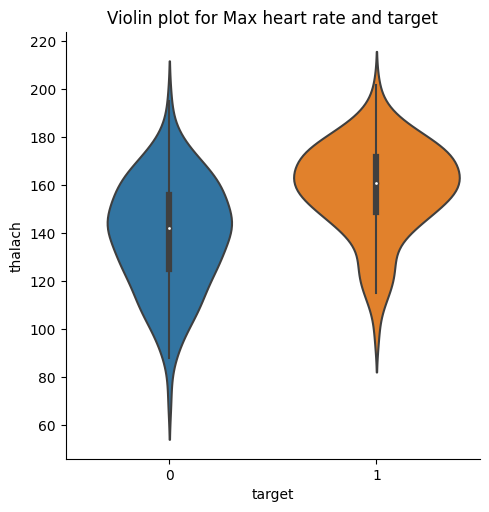

In [17]:
sns.catplot(data = df, x = 'target', y = 'thalach', kind = 'violin')
plt.title("Violin plot for Max heart rate and target");

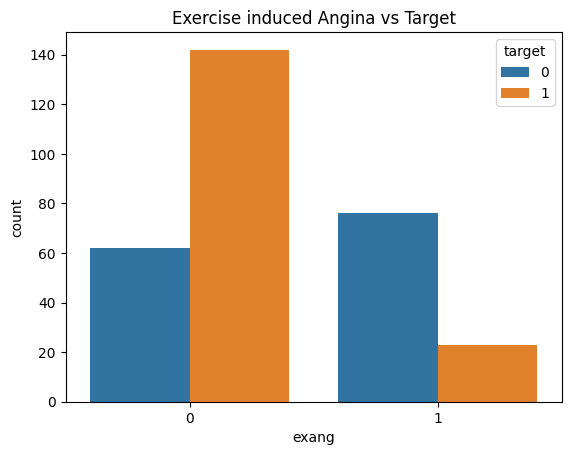

In [18]:
sns.countplot(data =df, x = 'exang',  hue = 'target')
plt.title("Exercise induced Angina vs Target");

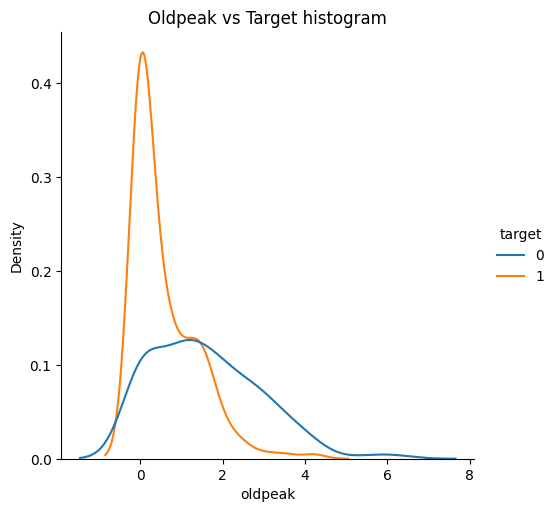

In [19]:
sns.displot(data =df, x = 'oldpeak', hue = 'target', kind = 'kde')
plt.title("Oldpeak vs Target histogram", fontsize = 12);

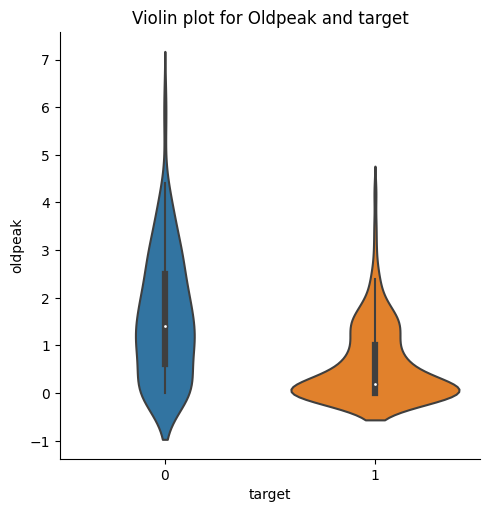

In [20]:
sns.catplot(data = df, x = 'target', y = 'oldpeak', kind = 'violin')
plt.title("Violin plot for Oldpeak and target");

In [21]:
# sns.pairplot(data = df, hue="target", corner=True);

## Model Building

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.losses import BinaryCrossentropy

In [23]:
X = df.drop(columns = 'target')
y = df.target

In [24]:
df.shape

(303, 14)

In [25]:
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_features = [x for x in X.columns if x not in num_features]
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

### Feature preprocessing using sklearn

In [26]:
pre_processor = ColumnTransformer([('scaler', StandardScaler(), num_features),
                                  ('ohe', OneHotEncoder(), cat_features)], remainder = 'passthrough', verbose = True)  
#('ohe', OneHotEncoder(), cat_features)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=42)

In [28]:
# y_train_softmax = tf.keras.utils.to_categorical(y_train)
# y_test_softmax = tf.keras.utils.to_categorical(y_test)

In [29]:
X_train_processed = pre_processor.fit_transform(X_train)
X_test_processed = pre_processor.transform(X_test)

[ColumnTransformer] ........ (1 of 2) Processing scaler, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing ohe, total=   0.0s


In [30]:
input_shape = [X_train_processed.shape[1]]
input_shape

[30]

### Creating Model

In [31]:
# define a function to build the keras model
def model_nn():
    # create model
    model = tf.keras.Sequential([
        tf.keras.Input(shape = input_shape),
        
        layers.Dense(16, activation = 'relu', name = 'layer_1'), #input_shape = input_shape,
        layers.BatchNormalization(name = 'BN_1'),
        layers.Dropout(rate = 0.3, name = 'drop_1'),
        
        layers.Dense(8, activation = 'relu', name = 'layer_2'),
        layers.BatchNormalization(name = 'BN_2'),
        layers.Dropout(rate = 0.3, name = 'drop_2'),
    
        # layers.Dense(8, activation = 'relu', name = 'layer_3'),
        # layers.BatchNormalization(name = 'BN_3'),
        # layers.Dropout(rate = 0.3, name = 'drop_3'),
        
        layers.Dense(1, activation = 'sigmoid', name = 'output_layer')
        # layers.Dense(2, activation = 'softmax', name = 'output_layer')
    ])    
    
    # compile model
    model.compile(loss = 'binary_crossentropy',  #categorical_hinge
                  optimizer = 'Adam', 
                  metrics = ['binary_accuracy']) #accuracy #tf.keras.metrics.Precision(name='precision')
    return model

model = model_nn()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 16)                496       
                                                                 
 BN_1 (BatchNormalization)   (None, 16)                64        
                                                                 
 drop_1 (Dropout)            (None, 16)                0         
                                                                 
 layer_2 (Dense)             (None, 8)                 136       
                                                                 
 BN_2 (BatchNormalization)   (None, 8)                 32        
                                                                 
 drop_2 (Dropout)            (None, 8)                 0         
                                                                 
 output_layer (Dense)        (None, 1)                 9

In [32]:
# fit the model to the training data
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_binary_accuracy',
    patience = 10,
    min_delta = 0.0001,
    start_from_epoch = 10,
    verbose = 2,
    restore_best_weights = True,
)


history = model.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test), 
                    batch_size=8,
                    epochs=100, 
                    verbose=1,
                    callbacks=[early_stopping],)

Epoch 1/100
29/29 [==============================] - 2s 8ms/step - loss: 0.8542 - binary_accuracy: 0.5859 - val_loss: 0.6398 - val_binary_accuracy: 0.5789
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.7973 - binary_accuracy: 0.5991 - val_loss: 0.6232 - val_binary_accuracy: 0.6184
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.7233 - binary_accuracy: 0.6211 - val_loss: 0.6071 - val_binary_accuracy: 0.6447
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6140 - binary_accuracy: 0.7048 - val_loss: 0.5937 - val_binary_accuracy: 0.6447
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6292 - binary_accuracy: 0.6564 - val_loss: 0.5900 - val_binary_accuracy: 0.6447
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6186 - binary_accuracy: 0.6520 - val_loss: 0.5907 - val_binary_accuracy: 0.6711
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - los

In [33]:
pd.DataFrame(history.history)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.854163,0.585903,0.639779,0.578947
1,0.797330,0.599119,0.623215,0.618421
2,0.723275,0.621145,0.607066,0.644737
3,0.614036,0.704846,0.593666,0.644737
4,0.629163,0.656388,0.589988,0.644737
5,0.618572,0.651982,0.590738,0.671053
6,0.656567,0.713656,0.592625,0.671053
7,0.593265,0.682819,0.595893,0.671053
8,0.591715,0.709251,0.595866,0.657895
9,0.546068,0.740088,0.600348,0.657895


### Model Analysis

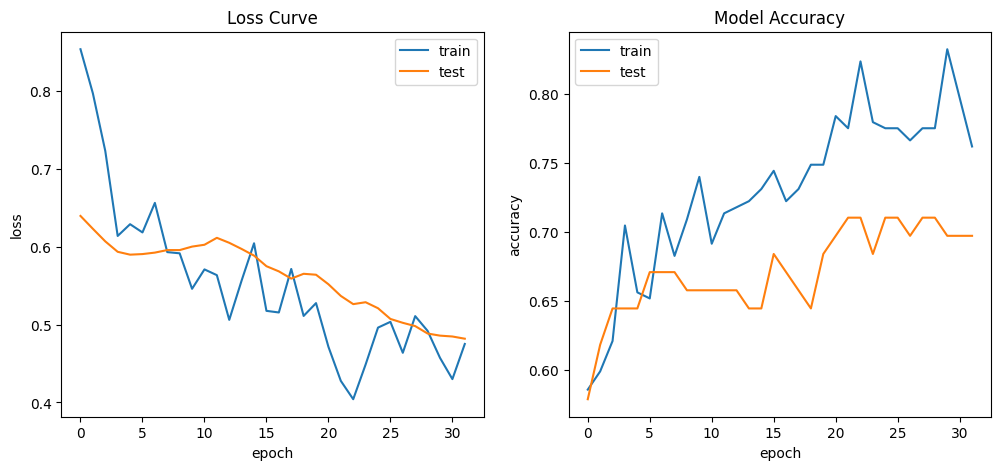

In [34]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Loss Curve')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'])


axs[1].plot(history.history['binary_accuracy'])
axs[1].plot(history.history['val_binary_accuracy'])
axs[1].set_title('Model Accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test']);

In [35]:
preds_prob = model.predict(X_test_processed,
              batch_size = 8,
              verbose = 2)

10/10 - 0s - 115ms/epoch - 11ms/step


In [36]:
pred_class = (preds_prob>0.5).astype(int)

In [37]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69        35
           1       0.74      0.71      0.72        41

    accuracy                           0.71        76
   macro avg       0.71      0.71      0.71        76
weighted avg       0.71      0.71      0.71        76



## Solution as per the Keras tutorial

In [38]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup

In [39]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)

In [40]:
df.shape

(303, 14)

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [42]:
val_dataframe = df.sample(frac=0.2, random_state=1337)
train_dataframe = df.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
);

Using 242 samples for training and 61 for validation


In [43]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("target")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [44]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'age': <tf.Tensor: shape=(), dtype=int64, numpy=66>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cp': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=160>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=246>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'restecg': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=120>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'slope': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'ca': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'fixed'>}
Target: tf.Tensor(1, shape=(), dtype=int64)


In [45]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

### Feature preprocessing with Keras layers

In [46]:
def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="one_hot")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

#### 1st method

In [47]:
# Categorical features encoded as integers
sex = keras.Input(shape=(1,), name="sex", dtype="int64")
cp = keras.Input(shape=(1,), name="cp", dtype="int64")
fbs = keras.Input(shape=(1,), name="fbs", dtype="int64")
restecg = keras.Input(shape=(1,), name="restecg", dtype="int64")
exang = keras.Input(shape=(1,), name="exang", dtype="int64")
ca = keras.Input(shape=(1,), name="ca", dtype="int64")
slope = keras.Input(shape=(1,), name="slope", dtype="int64")

# Categorical feature encoded as string
thal = keras.Input(shape=(1,), name="thal", dtype="string")

# Numerical features
age = keras.Input(shape=(1,), name="age")
trestbps = keras.Input(shape=(1,), name="trestbps")
chol = keras.Input(shape=(1,), name="chol")
thalach = keras.Input(shape=(1,), name="thalach")
oldpeak = keras.Input(shape=(1,), name="oldpeak")

In [48]:
all_inputs = [
    sex,
    cp,
    fbs,
    restecg,
    exang,
    ca,
    slope,
    thal,
    age,
    trestbps,
    chol,
    thalach,
    oldpeak,
]

In [49]:
all_inputs

[<KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'sex')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'cp')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'fbs')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'restecg')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'exang')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'ca')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'slope')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'thal')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'trestbps')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'chol')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'thalach')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'oldpeak')>]

In [50]:
# Integer categorical features
sex_encoded = encode_categorical_feature(sex, "sex", train_ds, False)
cp_encoded = encode_categorical_feature(cp, "cp", train_ds, False)
fbs_encoded = encode_categorical_feature(fbs, "fbs", train_ds, False)
restecg_encoded = encode_categorical_feature(restecg, "restecg", train_ds, False)
exang_encoded = encode_categorical_feature(exang, "exang", train_ds, False)
ca_encoded = encode_categorical_feature(ca, "ca", train_ds, False)
slope_encoded = encode_categorical_feature(slope, "slope", train_ds, False)

# String categorical features
thal_encoded = encode_categorical_feature(thal, "thal", train_ds, True)

# Numerical features
age_encoded = encode_numerical_feature(age, "age", train_ds)
trestbps_encoded = encode_numerical_feature(trestbps, "trestbps", train_ds)
chol_encoded = encode_numerical_feature(chol, "chol", train_ds)
thalach_encoded = encode_numerical_feature(thalach, "thalach", train_ds)
oldpeak_encoded = encode_numerical_feature(oldpeak, "oldpeak", train_ds)

In [51]:
all_features = layers.concatenate(
    [
        sex_encoded,
        cp_encoded,
        fbs_encoded,
        restecg_encoded,
        exang_encoded,
        ca_encoded,
        slope_encoded,
        thal_encoded,
        age_encoded,
        trestbps_encoded,
        chol_encoded,
        thalach_encoded,
        oldpeak_encoded,
    ]
)

#### Shorted Method

In [52]:
#alternative method
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'slope']
cat_feat_str = ['thal']
num_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

all_inputs_short = []
all_features_short = []

for inputs in cat_feat:
    cat_col = keras.Input(shape=(1,), name=inputs, dtype="int64")
    encoded_cat_col = encode_categorical_feature(cat_col, inputs, train_ds, False)
    all_inputs_short.append(cat_col)
    all_features_short.append(encoded_cat_col)

for inputs in cat_feat_str:
    cat_col = keras.Input(shape=(1,), name=inputs, dtype="string")
    encoded_cat_col = encode_categorical_feature(cat_col, inputs, train_ds, True)
    all_inputs_short.append(cat_col)
    all_features_short.append(encoded_cat_col)

for inputs in num_feat:
    cat_col = keras.Input(shape=(1,), name=inputs,) #dtype="float32"
    encoded_cat_col = encode_numerical_feature(cat_col, inputs, train_ds)
    all_inputs_short.append(cat_col)
    all_features_short.append(encoded_cat_col)

In [53]:
all_inputs_short

[<KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'sex')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'cp')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'fbs')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'restecg')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'exang')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'ca')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'slope')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'thal')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'trestbps')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'chol')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'thalach')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'oldpeak')>]

In [54]:
all_features_short

[<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'integer_lookup_7')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'integer_lookup_8')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'integer_lookup_9')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'integer_lookup_10')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'integer_lookup_11')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'integer_lookup_12')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'integer_lookup_13')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'string_lookup_1')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_7')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n

In [55]:
all_features_short = layers.concatenate(all_features_short)
all_features_short

<KerasTensor: shape=(None, 39) dtype=float32 (created by layer 'concatenate_1')>

### Build Model

In [56]:
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile(optimizer="adam", 
              loss="binary_crossentropy", 
              metrics=["binary_accuracy"])

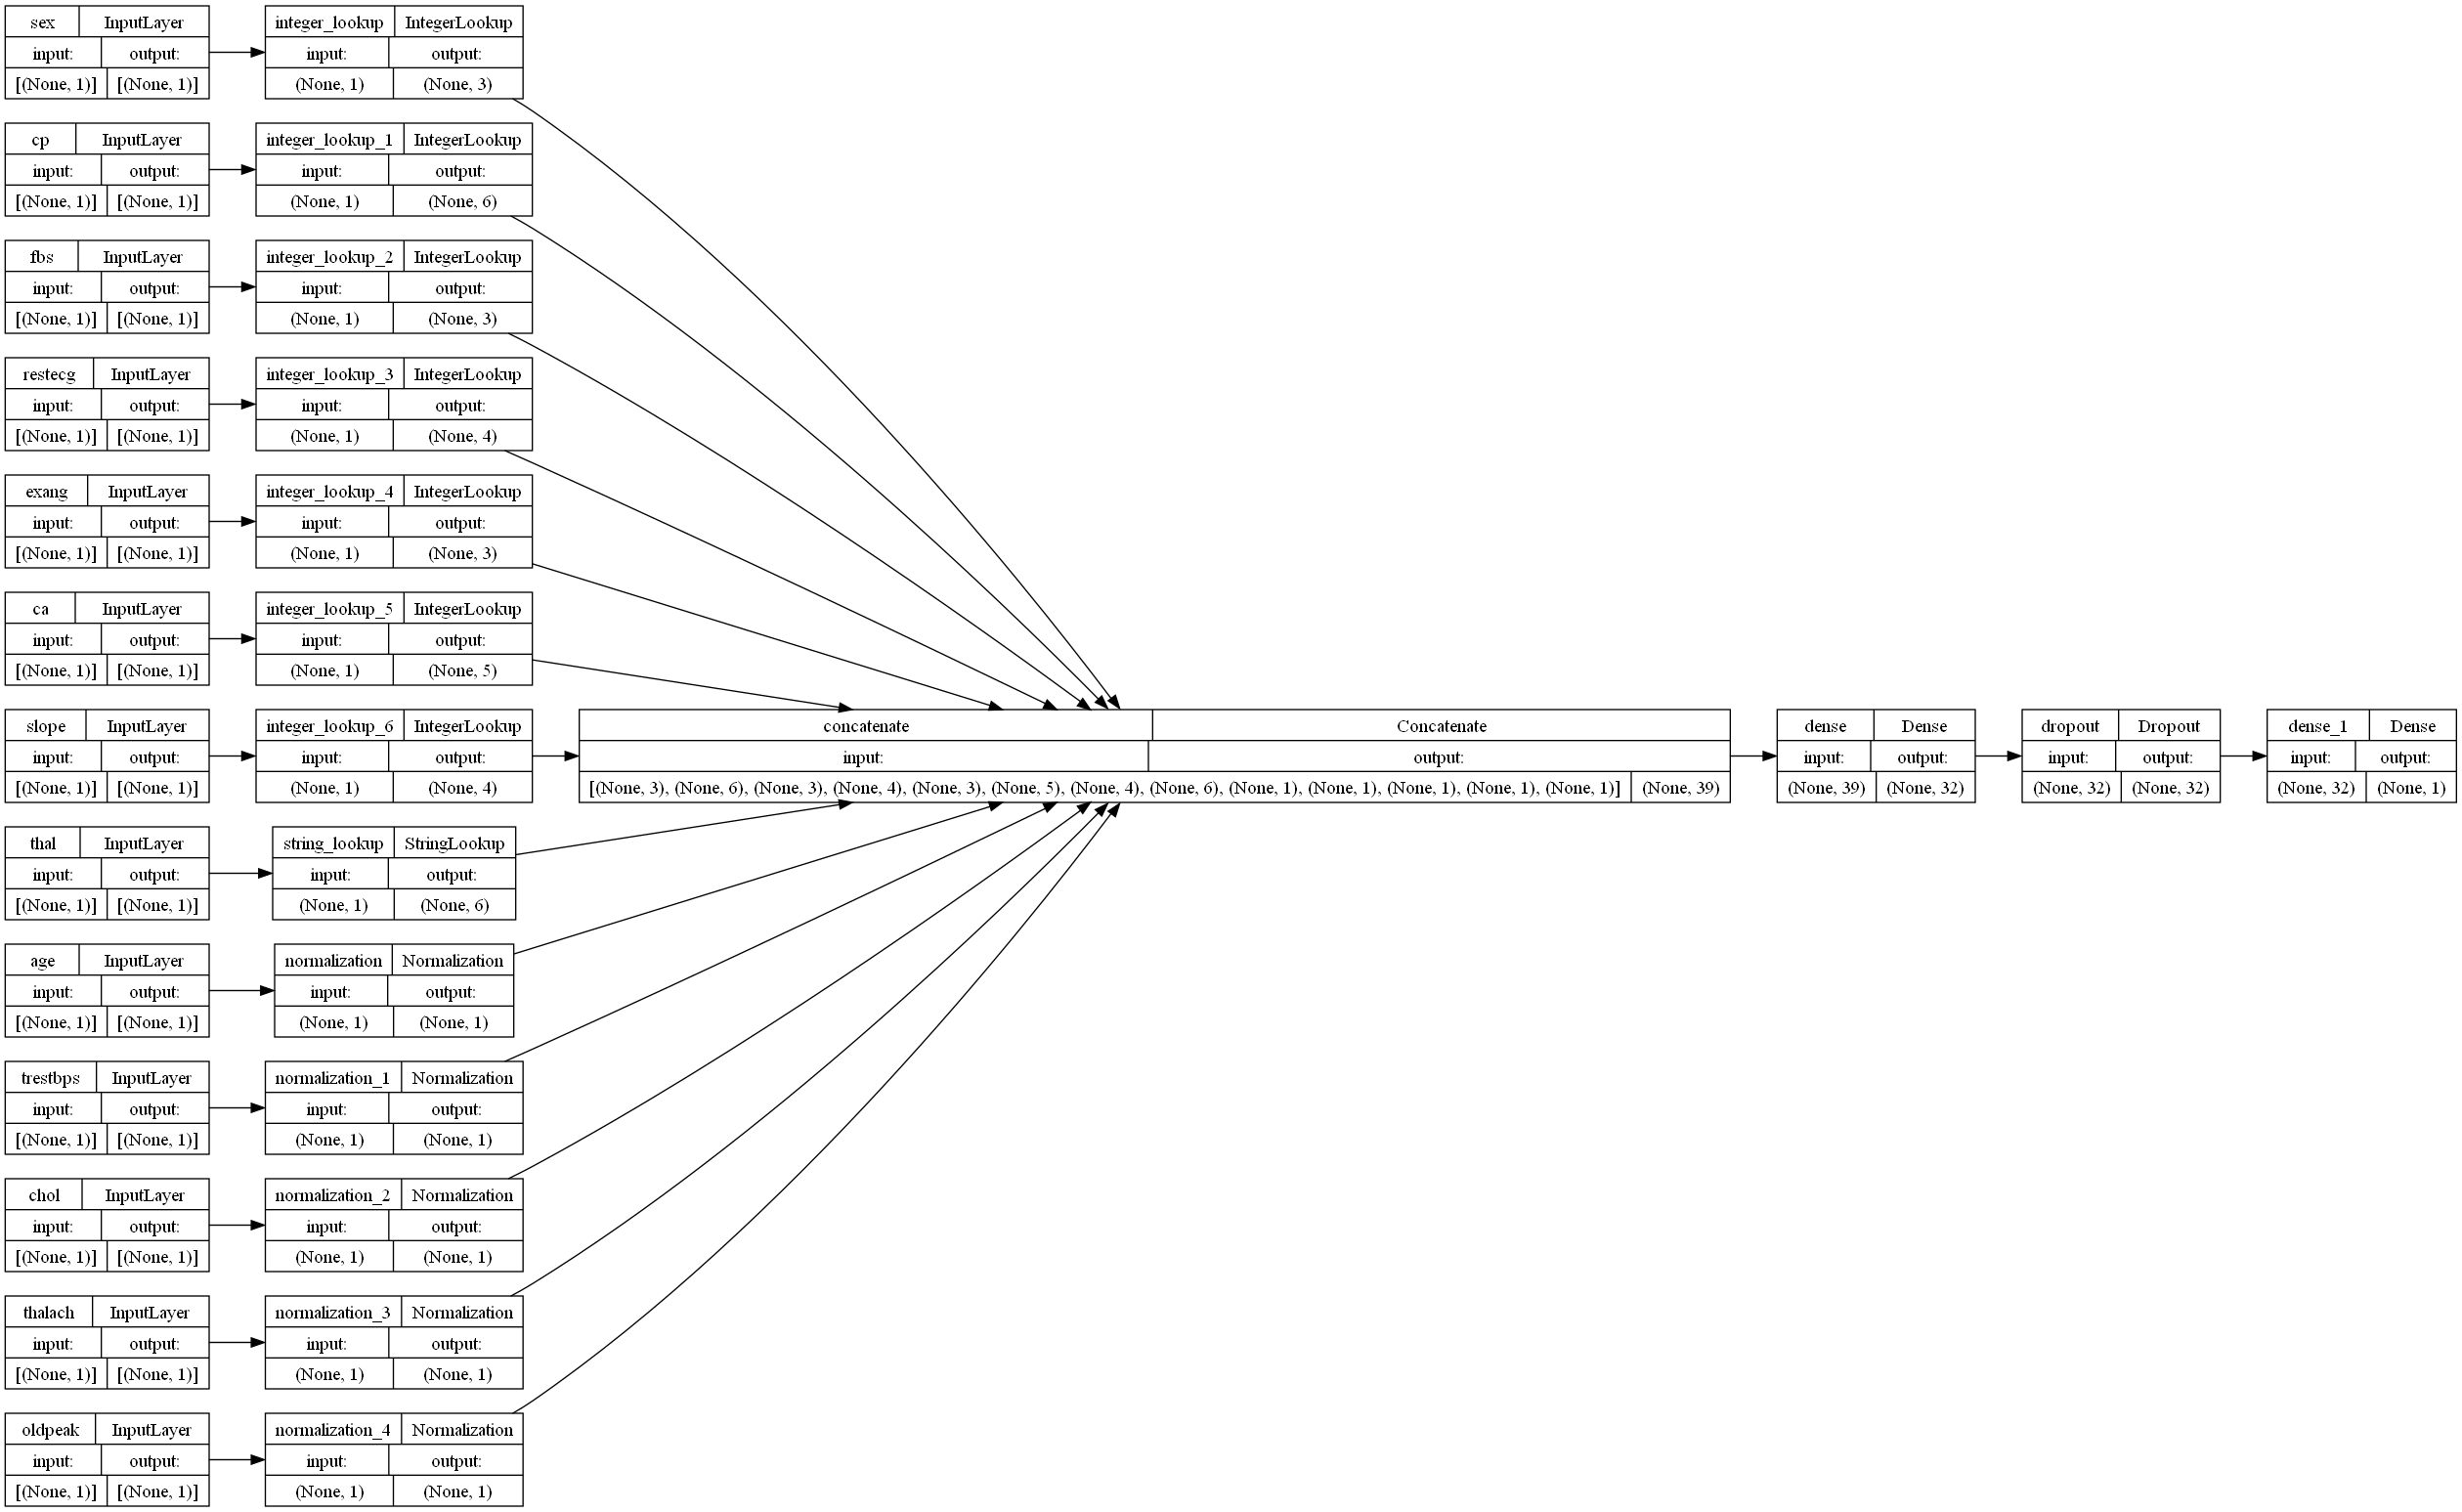

In [57]:
tf.keras.utils.plot_model(
    model,
    to_file='model_keras.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='LR',
    dpi=96,
    layer_range=None,
)

In [58]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
8/8 [==============================] - 1s 53ms/step - loss: 0.6468 - binary_accuracy: 0.6488 - val_loss: 0.5447 - val_binary_accuracy: 0.8033
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.5534 - binary_accuracy: 0.7231 - val_loss: 0.5012 - val_binary_accuracy: 0.8361
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5326 - binary_accuracy: 0.7273 - val_loss: 0.4681 - val_binary_accuracy: 0.8197
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5165 - binary_accuracy: 0.7438 - val_loss: 0.4437 - val_binary_accuracy: 0.8197
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4858 - binary_accuracy: 0.7686 - val_loss: 0.4251 - val_binary_accuracy: 0.7705
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4977 - binary_accuracy: 0.7686 - val_loss: 0.4115 - val_binary_accuracy: 0.7869
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4497 - binary_a

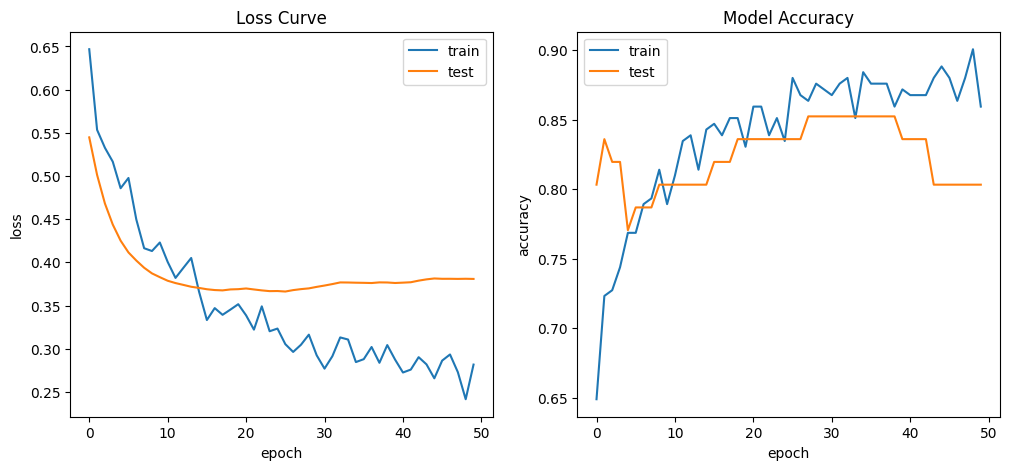

In [59]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Loss Curve')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'])


axs[1].plot(history.history['binary_accuracy'])
axs[1].plot(history.history['val_binary_accuracy'])
axs[1].set_title('Model Accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test']);

## Inference on new data

In [60]:
sample = {
    "age": 60,
    "sex": 1,
    "cp": 1,
    "trestbps": 145,
    "chol": 233,
    "fbs": 1,
    "restecg": 2,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 2.3,
    "slope": 3,
    "ca": 0,
    "thal": "fixed",
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(
    "This particular patient had a %.1f percent probability "
    "of having a heart disease, as evaluated by our model." % (100 * predictions[0][0],)
)

1/1 [==============================] - 0s 241ms/step
This particular patient had a 16.8 percent probability of having a heart disease, as evaluated by our model.
